<h1>App Physics 155 - LE 3</h1>
<h2>Kenneth V. Domingo<br />
2015-03116</h2>

<b>Problem 3.2: The Lorenz equations</b>

One of the most celebrated sets of differential equations in physics is the Lorenz equations:

\begin{equation}
    \frac{dx}{dt} = \sigma(y-x)
\end{equation}
\begin{equation}
    \frac{dy}{dt} = rx - y - xz
\end{equation}
\begin{equation}
    \frac{dz}{dt} = xy - bz
\end{equation}

where $\sigma$, $r$, and $b$ are constants. (The names $\sigma$, $r$, and $b$ are odd, but traditional — they are always used in these equations for historical reasons.)

These equations were first studied by Edward Lorenz in 1963, who derived them from a simplified model of weather patterns. The reason for their fame is that they were one of the first incontrovertible examples of deterministic chaos, the occurrence of apparently random motion even though there is no randomness built into the equations.

a) Write a program to solve the Lorenz equations for the case $\sigma$ = 10, $r$ = 28, and $b$ = $\frac{8}{3}$ in the range from $t$ = 0 to $t$ = 50 with initial conditions $(x, y, z)$ = (0, 1, 0). Have your program make a plot of $y$ as a function of time. Note the unpredictable nature of the motion. (Hint: If you base your program on previous ones, be careful. This problem has parameters $r$ and $b$ with the same names as variables in previous programs — make sure to give your variables new names, or use different names for the parameters, to avoid introducing errors into your code.)

b) Modify your program to produce a plot of $z$ against $x$. You should see a picture of the famous “strange attractor” of the Lorenz equations, a lop-sided butterfly-shaped plot that never repeats itself.

In [2]:
import numpy as np
import matplotlib.pyplot as mp
%matplotlib inline

In [3]:
sigma = 10
rho = 28
beta = 8/3
ta = 0.0
tb = 50.0
N = 10000
h = (tb-ta)/N

def f(r,t):
    x, y, z = r[0], r[1], r[2]
    fx = sigma*(y-x)
    fy = rho*x - y - x*z
    fz = x*y - beta*z
    return np.array([ fx , fy , fz ], float)

tpoints = np.arange(ta,tb,h)
xpoints = []
ypoints = []
zpoints = []
r = np.array([ 0.0 , 1.0 , 0.0 ], float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    zpoints.append(r[2])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

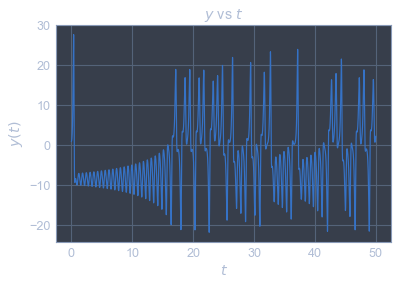

In [4]:
mp.plot(tpoints,ypoints)
mp.xlabel("$t$")
mp.ylabel("$y(t)$")
mp.title("$y$ vs $t$")
mp.show()

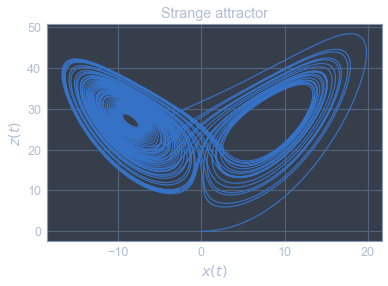

In [5]:
mp.plot(xpoints,zpoints)
mp.xlabel("$x(t)$")
mp.ylabel("$z(t)$")
mp.title("Strange attractor")
mp.show()